# Imports



"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.

Sabendo do seu significado e importância, verificou-se a necessidade de analisar como as industrias brasileiras se encontravam no ano de 2022 o link para download do arquivo foi retirado do kaggle: https://www.kaggle.com/datasets/ramjasmaurya/unicorn-startups

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Leitura dos dados

In [7]:
url = 'https://raw.githubusercontent.com/mariaefoliveira/Analise-de-Dados/main/Empresas%20unic%C3%B3rnio%202022%20-%20Brasil/unicorns%20till%20sep%202022.csv'

dados = pd.read_csv(url)

dados.shape

(1186, 7)

In [8]:
dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [9]:
dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [10]:
dados.rename(columns={
    'Company':'Companhia',
    'Valuation ($B)': 'Avaliação ($B)',
    'Date Joined': 'Data de Adesão',
    'Country': 'País',
    'City\xa0': 'Cidade',
    'Industry': 'Industria',
    'Investors':'Investidores'
},
             inplace = True)

#Verificação

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Companhia       1186 non-null   object
 1   Avaliação ($B)  1186 non-null   object
 2   Data de Adesão  1186 non-null   object
 3   País            1186 non-null   object
 4   Cidade          1186 non-null   object
 5   Industria       1186 non-null   object
 6   Investidores    1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [12]:
dados.isnull().sum()

Companhia          0
Avaliação ($B)     0
Data de Adesão     0
País               0
Cidade             0
Industria          0
Investidores      18
dtype: int64

#Conversão do tipo

In [13]:
dados['Data de Adesão'] = pd.to_datetime(dados['Data de Adesão'])

##Removendo o $ e convertendo para o tipo float

In [14]:
dados['Avaliação ($B)'] = dados['Avaliação ($B)'].str.replace('$','')
dados['Avaliação ($B)'] = pd.to_numeric(dados['Avaliação ($B)'])

<ipython-input-14-6dc7f322734f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['Avaliação ($B)'] = dados['Avaliação ($B)'].str.replace('$','')


#Análise

In [15]:
dados['Industria'].value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

### Gráfico de barra

In [25]:
def conf_grafico(larg, altura):
  plt.figure(figsize = (larg,altura))
  plt.grid(which='both', alpha=0.3)
  plt.xticks(rotation = 45, ha='right')


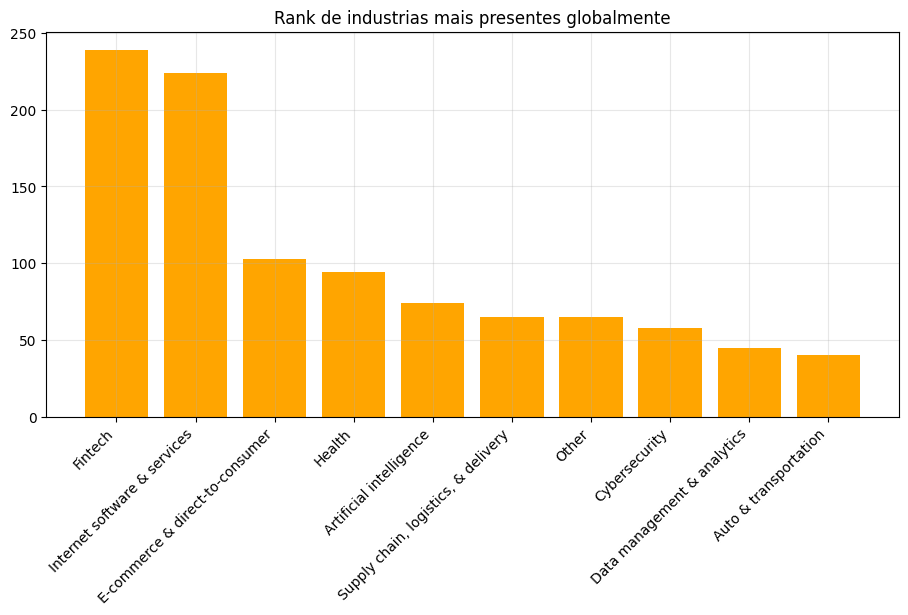

In [26]:
#configuração do gráfico de barra
conf_grafico(11,5)

plt.title('Rank de industrias mais presentes globalmente')

#configuração da legenda das barras

#gráfico de barra
plt.bar(
    dados['Industria'].value_counts().head(10).index,
    dados['Industria'].value_counts().head(10),
    color='orange'
    );



###Insight

A indústria que possui maior presença como empresa unicórnio é a Fintech e Internet software & services, mostrando a expansão crescente dessas áreas

##Análise do Brasil

In [17]:
dados_brasil = dados.loc[dados['País'] == 'Brazil'].reset_index()

dados_brasil

,index,Companhia,Avaliação ($B),Data de Adesão,País,Cidade,Industria,Investidores
0,132,QuintoAndar,5.10,2019-09-09,Brazil,Campinas,E-commerce & direct-to-consumer,"Kaszek Ventures, General Atlantic, SoftBank Group"
1,133,C6 Bank,5.05,2020-12-02,Brazil,Sao Paulo,Fintech,Credit Suisse
2,158,Creditas,4.80,2020-12-18,Brazil,Sao Paulo,Fintech,"Kaszek Ventures, Amadeus Capital Partners, Quo..."
3,283,Nuvemshop,3.10,2021-08-17,Brazil,Sao Paulo,E-commerce & direct-to-consumer,"Kaszek Ventures, Qualcomm Ventures, Accel"
4,291,Wildlife Studios,3.00,2019-12-05,Brazil,Sao Paulo,Other,"Benchmark, Bessemer Venture Partners"
5,323,Loft,2.90,2020-01-03,Brazil,Sao Paulo,E-commerce & direct-to-consumer,"Monashees+, Andreessen Horowitz, QED Investors"
6,350,Unico,2.60,2021-08-03,Brazil,Sao Paulo,Artificial intelligence,"Big Bets, General Atlantic, SOFTBANK Latin Ame..."
7,423,CloudWalk,2.15,2021-09-08,Brazil,Sao Paulo,Fintech,"Plug and Play Ventures, Valor Capital Group, D..."
8,470,Loggi,2.00,2019-06-05,Brazil,Sao Paulo,"Supply chain, logistics, & delivery","Qualcomm Ventures, SoftBank Group. Monashees+"
9,643,Olist,1.50,2021-12-15,Brazil,Curitiba,E-commerce & direct-to-consumer,"Redpoint e.ventures, Valor Capital Group, Soft..."


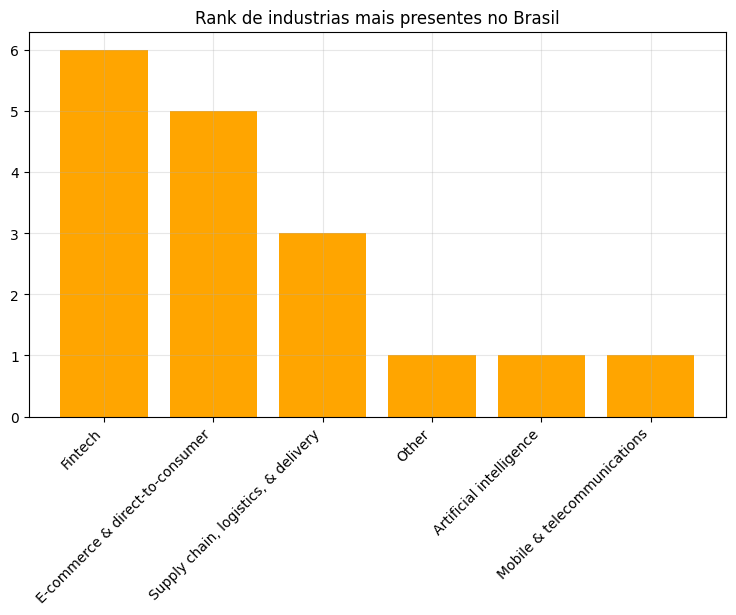

In [27]:
#configuração do gráfico de barra
conf_grafico(9,5)

plt.title('Rank de industrias mais presentes no Brasil')

#gráfico de barra
plt.bar(
    dados_brasil['Industria'].value_counts().head(10).index,
    dados_brasil['Industria'].value_counts().head(10),
    color='orange'
    );


###Insight
Comparando o gráfico com o anterior que mostra de forma global com este do Brasil, notou-se algumas diferenças como no terceiro lugar entrar logistica, delivery e cadeia de mantimentos, mas em primeiro e segundo lugar continuam nas mesmas posições indicando como essa área é bem presente não só globalmente mas como no Brasil, chegando a ter 6 industrias "Fintech" e "E-commerce"

In [19]:
analise_brasil = round(dados_brasil['Cidade'].value_counts(normalize=True) *100,1)

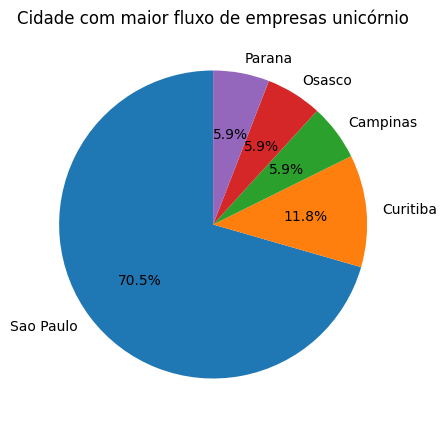

In [28]:
plt.figure(figsize=(15,5))

plt.title('Cidade com maior fluxo de empresas unicórnio')

plt.pie(
    analise_brasil,
    labels=analise_brasil.index,
    startangle=90,
    autopct = '%1.1f%%'
);

###Insight
A cidade de São Paulo é o que constitui 70% das empresas unicórnio no Brasil onde a segunda maior porcentagem é Curitiba

In [21]:
dados_brasil[[
    'Companhia',
    'Cidade',
    'Data de Adesão',
    'Avaliação ($B)']].sort_values('Avaliação ($B)', ascending=False)

,Companhia,Cidade,Data de Adesão,Avaliação ($B)
0,QuintoAndar,Campinas,2019-09-09,5.10
1,C6 Bank,Sao Paulo,2020-12-02,5.05
2,Creditas,Sao Paulo,2020-12-18,4.80
3,Nuvemshop,Sao Paulo,2021-08-17,3.10
4,Wildlife Studios,Sao Paulo,2019-12-05,3.00
5,Loft,Sao Paulo,2020-01-03,2.90
6,Unico,Sao Paulo,2021-08-03,2.60
7,CloudWalk,Sao Paulo,2021-09-08,2.15
8,Loggi,Sao Paulo,2019-06-05,2.00
9,Olist,Curitiba,2021-12-15,1.50


### Insight
As empresas que possuem uma avaliação acima de 4 bilhões são Quinto Andar e C6Bank localizado na cidade de Campinas e São Paulo respectivamente

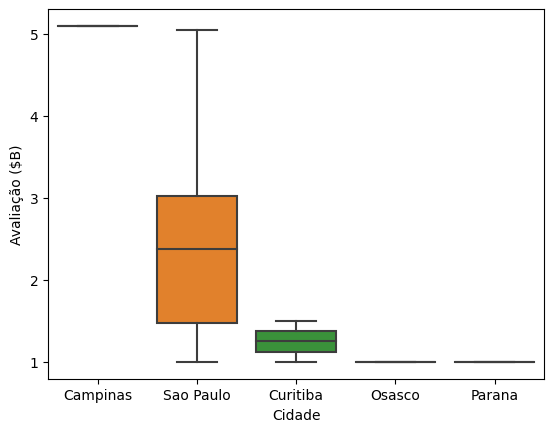

In [37]:
sns.boxplot(dados_brasil, x='Cidade', y= 'Avaliação ($B)');

###Insight

Dá para perceber com o boxplot que a mediana de São Paulo dá entre 2.3 à 2.5 enquanto os outros possuem sua mediana baixa, dado a quantidade de empresas que há em São Paulo que engloba cerca de 70% como mostrado
anteriormente no gráfico de pizza

In [36]:
dados_sp = dados_brasil.query('Cidade == "Sao Paulo"')

,index,Companhia,Avaliação ($B),Data de Adesão,País,Cidade,Industria,Investidores
1,133,C6 Bank,5.05,2020-12-02,Brazil,Sao Paulo,Fintech,Credit Suisse
2,158,Creditas,4.80,2020-12-18,Brazil,Sao Paulo,Fintech,"Kaszek Ventures, Amadeus Capital Partners, Quo..."
3,283,Nuvemshop,3.10,2021-08-17,Brazil,Sao Paulo,E-commerce & direct-to-consumer,"Kaszek Ventures, Qualcomm Ventures, Accel"
4,291,Wildlife Studios,3.00,2019-12-05,Brazil,Sao Paulo,Other,"Benchmark, Bessemer Venture Partners"
5,323,Loft,2.90,2020-01-03,Brazil,Sao Paulo,E-commerce & direct-to-consumer,"Monashees+, Andreessen Horowitz, QED Investors"
6,350,Unico,2.60,2021-08-03,Brazil,Sao Paulo,Artificial intelligence,"Big Bets, General Atlantic, SOFTBANK Latin Ame..."
7,423,CloudWalk,2.15,2021-09-08,Brazil,Sao Paulo,Fintech,"Plug and Play Ventures, Valor Capital Group, D..."
8,470,Loggi,2.00,2019-06-05,Brazil,Sao Paulo,"Supply chain, logistics, & delivery","Qualcomm Ventures, SoftBank Group. Monashees+"
10,659,Dock,1.50,2022-05-12,Brazil,Sao Paulo,Fintech,"Viking Global Investors, Riverwood Capital, Li..."
11,711,Neon,1.38,2022-02-14,Brazil,Sao Paulo,Fintech,"Propel Venture Partners, Monashees+, BBVA"


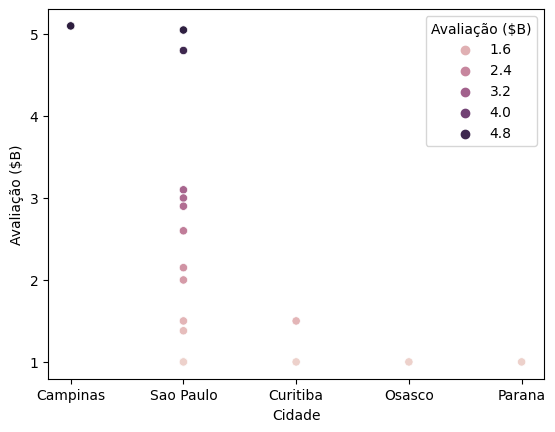

In [50]:
sns.scatterplot(dados_brasil, x='Cidade', y= 'Avaliação ($B)', hue='Avaliação ($B)');

###Insight

Com o gráfico acima já fica mais claro a distribuição da avaliação entre as cidades. Nota-se que a maioria das empresas de São Paulo estão abaixo de `$ 4.0 B` ainda sendo destaque em comparação as empresas de outras cidades que possuem sua avaliação até `$ 2.4B`